# **Simple multi-layer perceptron**


In [0]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop


**Set vars, load MNIST (hand written digits) data**

In [0]:
batch_size = 128
num_classes = 10
epochs = 5

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()


**Visualize data**

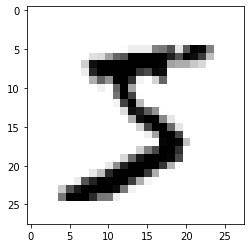

In [19]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

TypeError: ignored

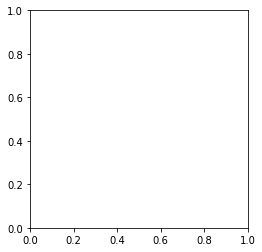

In [16]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


In [0]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

**Model description**

- Put the "lego blocks" together


In [0]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


**Visualization of the model**

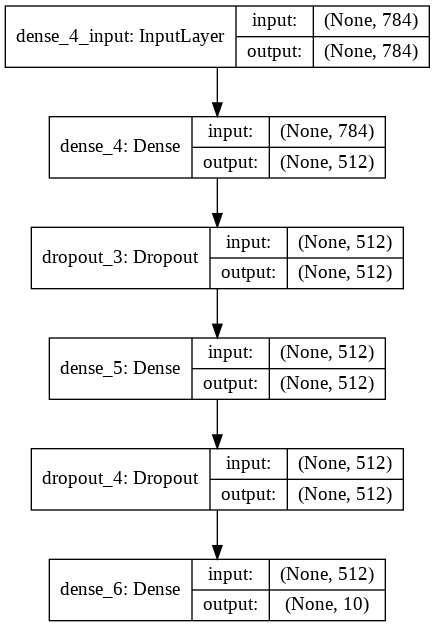

In [0]:
from keras.utils import plot_model

#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
plot_model(model, show_shapes=True, show_layer_names=True)

**Compile the model**

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

**Fit the model**

In [0]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/5





60000/60000 [==============================] - 10s 159us/step - loss: 0.2564 - acc: 0.9212 - val_loss: 0.1210 - val_acc: 0.9626
Epoch 2/5
60000/60000 [==============================] - 9s 148us/step - loss: 0.1066 - acc: 0.9684 - val_loss: 0.0887 - val_acc: 0.9748
Epoch 3/5
60000/60000 [==============================] - 9s 148us/step - loss: 0.0793 - acc: 0.9762 - val_loss: 0.0966 - val_acc: 0.9722
Epoch 4/5
60000/60000 [==============================] - 9s 148us/step - loss: 0.0623 - acc: 0.9816 - val_loss: 0.0779 - val_acc: 0.9782
Epoch 5/5
60000/60000 [==============================] - 9s 149us/step - loss: 0.0507 - acc: 0.9848 - val_loss: 0.0806 - val_acc: 0.9791


**Evaluate the model**

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08061676700244352
Test accuracy: 0.9791
